In [ ]:
!pip install git+https://github.com/aimclub/eXplain-NNs &> /dev/null

In [ ]:
! pip install torchmetrics &> /dev/null
! pip install pip install giotto-ph==0.2.2 &> /dev/null
! pip install pip install giotto-tda==0.6.0 &> /dev/null
! pip install umap-learn==0.5.3 &> /dev/null

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import eXNN.topology

In [ ]:
tfm = transforms.ToTensor()
train_ds = MNIST(root='./.cache', train=True, download=True, transform=tfm)
test_ds = MNIST(root='./.cache', train=False, download=False, transform=tfm)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=36, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=36, shuffle=False)

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim, leaky_coef=0.1):
        super(SimpleNN, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(leaky_coef)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(leaky_coef)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(hidden_dim, output_dim)#,
            #nn.Sigmoid()
        )

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [ ]:
num_classes = 10
device = torch.device('cuda')
model = SimpleNN(28*28, num_classes, 64).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

n_epochs = 20
loss_fn = nn.CrossEntropyLoss()
for epoch in list(range(n_epochs)):
    for imgs, lbls in train_dl:
        optimizer.zero_grad()
        out = model(imgs.to(device))
        loss = loss_fn(out, lbls.to(device))
        loss.backward()
        optimizer.step()
    print("Epoch {} loss: {}".format(epoch, loss.item()))

Epoch 0 loss: 0.32030269503593445
Epoch 1 loss: 0.1036871150135994
Epoch 2 loss: 0.054214075207710266
Epoch 3 loss: 0.006467299070209265
Epoch 4 loss: 0.09548153728246689
Epoch 5 loss: 0.030587375164031982
Epoch 6 loss: 0.023598909378051758
Epoch 7 loss: 0.013796708546578884
Epoch 8 loss: 0.0027271907310932875
Epoch 9 loss: 0.005141113419085741
Epoch 10 loss: 0.004088823217898607
Epoch 11 loss: 0.005049467086791992
Epoch 12 loss: 0.07695259153842926
Epoch 13 loss: 0.00024215415760409087
Epoch 14 loss: 0.00046103785280138254
Epoch 15 loss: 0.006331140641123056
Epoch 16 loss: 0.004958560690283775
Epoch 17 loss: 0.0009534498676657677
Epoch 18 loss: 9.971039980882779e-05
Epoch 19 loss: 0.00018494240066502243


In [ ]:
model = model.to(torch.device('cpu'))
data = torch.stack([test_ds[i][0] for i in range(100)])
barcodes = eXNN.topology.get_nn_barcodes(model, data, layers = ['layer2'],
                                                 hom_type = "standard", coefs_type = "2")
barcode = barcodes['layer2']

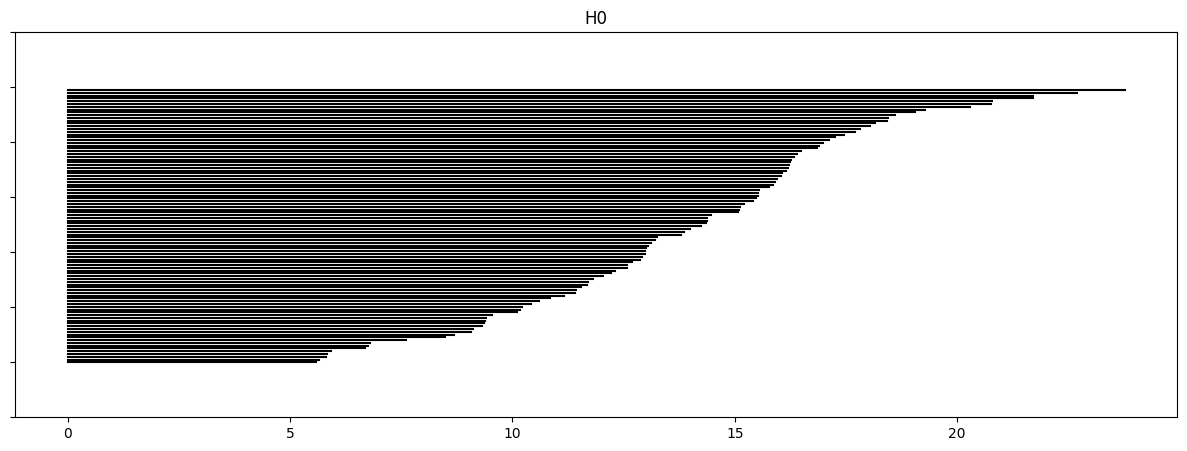

In [ ]:
eXNN.topology.plot_barcode(barcode)

In [ ]:
eXNN.topology.evaluate_barcode(barcode)

/usr/local/lib/python3.10/dist-packages/eXNN/topology/metrics.py:128: RuntimeWarning:

divide by zero encountered in double_scalars



{'max_length': 23.76395606994629,
 'mean_length': 13.847213778832947,
 'median_length': 14.244654655456543,
 'stdev_length': 4.05714772352715,
 'sum_length': 1370.8741641044617,
 'ratio_2_1': 4.069119138411215,
 'ratio_3_1': 3.8915751133693077,
 'h': 4.550077511213507,
 'normh': 0.6299251107499417,
 'snr': inf,
 'mean_birth': 0.0,
 'stdev_birth': 0.0,
 'mean_death': 13.847213778832947,
 'stdev_death': 4.05714772352715}